<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#What-is-JSON?" data-toc-modified-id="What-is-JSON?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is JSON?</a></span></li><li><span><a href="#JSON-Format" data-toc-modified-id="JSON-Format-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>JSON Format</a></span></li></ul></li><li><span><a href="#Loading-a-JSON-File" data-toc-modified-id="Loading-a-JSON-File-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading a JSON File</a></span><ul class="toc-item"><li><span><a href="#Exploring-JSON-Schemas" data-toc-modified-id="Exploring-JSON-Schemas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploring JSON Schemas</a></span></li></ul></li><li><span><a href="#Loading-in-Plant-Data" data-toc-modified-id="Loading-in-Plant-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading in Plant Data</a></span><ul class="toc-item"><li><span><a href="#What-Information-Do-We-Have?" data-toc-modified-id="What-Information-Do-We-Have?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What Information Do We Have?</a></span></li><li><span><a href="#Plant-Families" data-toc-modified-id="Plant-Families-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plant Families</a></span></li><li><span><a href="#Synonyms" data-toc-modified-id="Synonyms-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Synonyms</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Bibliography</a></span></li></ul></li><li><span><a href="#Matching-Author-and-Bibliography" data-toc-modified-id="Matching-Author-and-Bibliography-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matching Author and Bibliography</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Year" data-toc-modified-id="Year-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Year</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li></ul></div>

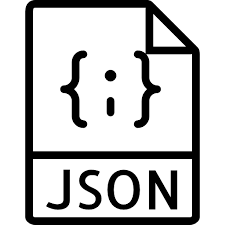

In [4]:
import json
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [6]:
# Open File

with open('../data/new_releases.json') as f:
    data = json.load(f)


The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [7]:
## This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [8]:
# One way to make it easier to read
print(json.dumps(data, indent=4))

{
    "albums": {
        "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
        "items": [
            {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
                        },
                        "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
                        "id": "1RyvyyTE3xzB2ZywiAwp0i",
                        "name": "Future",
                        "type": "artist",
                        "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AE",
                    "AR",
                    "AT",
                    "AU",
                    "BE",
                    "BG",
                    "BH",
                 

In [ ]:
# Using the default Jupyter Notebook's display() helps
# display(data) # Uncomment this to do the same as just displaying the last line
# data


To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [9]:
# Type

type(data)

dict

In [10]:
# Keys 

data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [11]:
# Check albums out

data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [12]:
# Check the keys out

data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](../images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [13]:
# Write for loop to look at the key and the data type

for key, value in data['albums'].items():
    print(key, type(value))




href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Adding this to our diagram, we now have something like this:

![](../images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [15]:
# Check out the type

data['albums']['items'][0]


{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

In [ ]:
# Check an idividual record out





We access values as we would for nested lists or dictionaries in Python.

In [16]:
# Access the keys for the dictionary

data['albums']['items'][0].keys()


dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [18]:
# Get the artist's name

data['albums']['items'][0]['artists'][0]['name']

'Future'

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [19]:
# Load 'em up!
# use plants.json from the data folder

with open('../data/plants.json') as f:
    data = json.load(f)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [20]:
# Type?

type(data)

list

In [21]:
# Size?

len(data)

1000

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [22]:
# Look at first one

data[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [23]:
# Create defaultdict

##defaultdict creates a default dictionary 

plant_dict = defaultdict(int)

for plant in data:
    plant_dict[plant['family_common_name']] += 1


In [24]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [ ]:
# Fill default dictionary


In [ ]:
# Check it out!


In [26]:
# Specific entry

plant_dict['Beech family']

10

Are there any missing values?

In [29]:
# How to look for missing?

plant_dict[None]


113

Let's remove these by using a dictionary comprehension:

In [30]:
# Dict comp!

fams_clean = {fam: num for fam, num in plant_dict.items() if fam != None}


In [31]:
fams_clean

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge family': 10,
 

Let's also remove the families whose counts are less than ten:

In [32]:
# More comps!

large_fam = {fam:count for fam, count in fams_clean.items() if count >=10}


Now we can make a bar chart of the numbers:

In [ ]:
plt.style.use('seaborn')

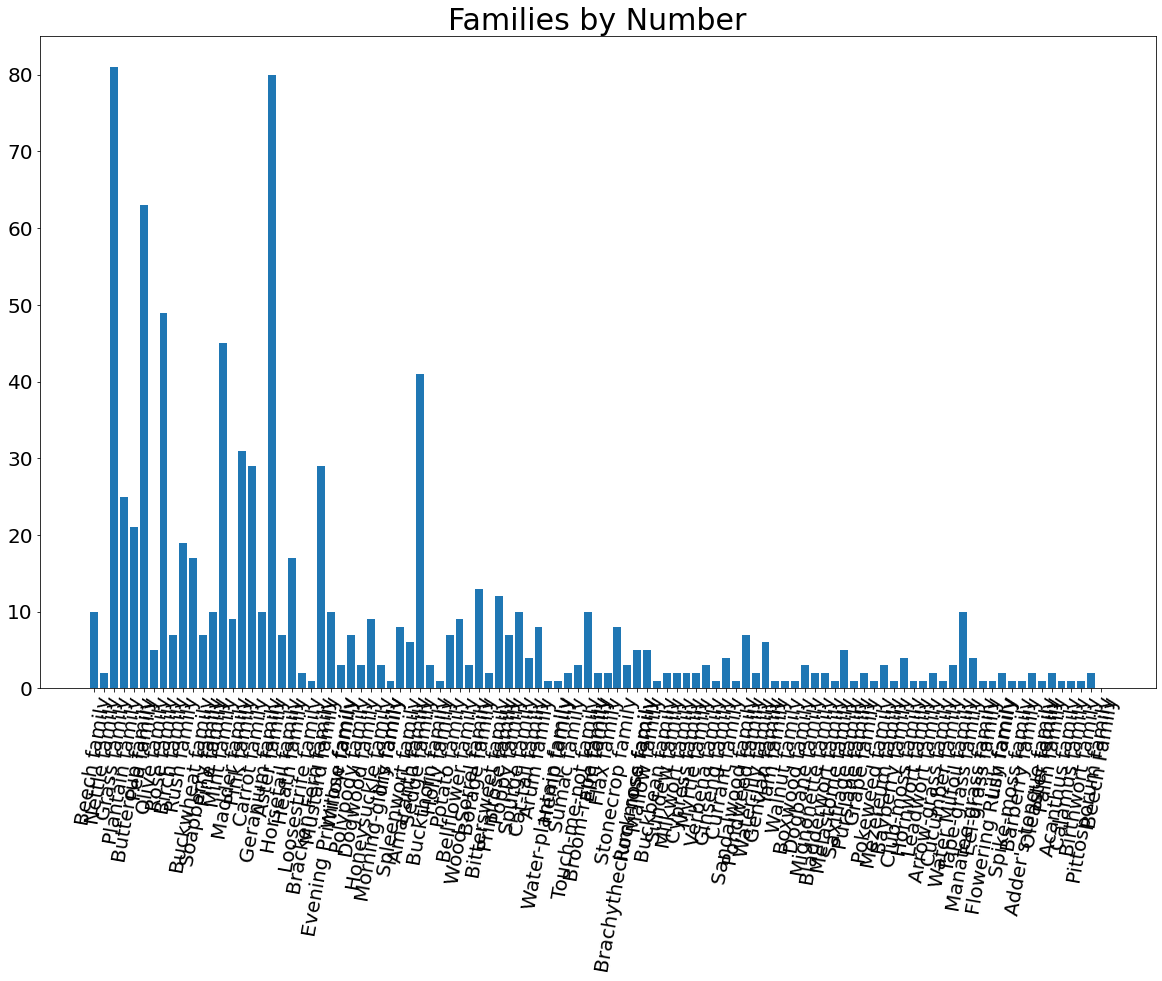

In [33]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=list(fams_clean.keys()), height=list(fams_clean.values()))
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

## Synonyms

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [36]:
num_syn = [len(plant['synonyms']) for plant in data]

num_syn

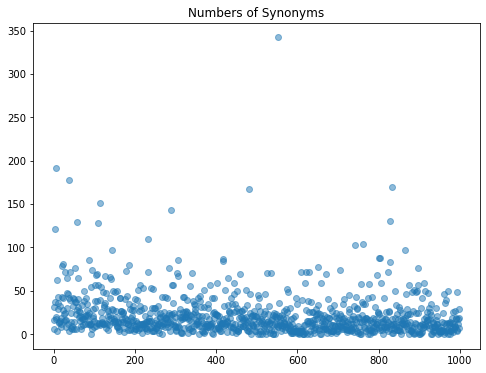

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [38]:
# Find it with a for loop

for plant in data:
    if len(plant['synonyms']) > 300:
        print(plant["common_name"])

Irish potato


In [39]:
# List comp?

[plant['common_name'] for plant in data if len(plant['synonyms']) > 300]

['Irish potato']

## Bibliography

In [ ]:
# Create a list with the bibliographies


In [ ]:
# Check it out!


Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [ ]:
# Get rid of the nulls (None)


In [ ]:
# How many did we lose?


In [ ]:
# Get a list of all those with Linnaeus


# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [ ]:
# For loop!


In [ ]:
# list comp?


In [ ]:
# Get a list of the authors


In [ ]:
# Make it unique!


In [ ]:
# Get a list of the counts of each author (hint: .count())


In [ ]:
# zip it with unique authors and check it out


## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records in ```plants```. Remember, all these records start with 'Sp. Pl.'

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

In [ ]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? 